#                                                Mental Health In Tech

####  Introduction

Mental health is a crucial aspect of our overall well-being. According to the World Health Organization (WHO), mental health is defined as a state of well-being in which every individual realizes their own potential, can cope with the normal stresses of life, can work productively and fruitfully, and is able to make a contribution to their community.

Mental health issues can arise due to various factors such as **childhood abuse, trauma, or neglect**, **social isolation or loneliness**, **experiencing discrimination and stigma**, **social disadvantage, poverty or debt**, **bereavement (losing someone close to you)**, **severe or long-term stress**, **having a long-term physical health condition**, **unemployment or losing your job**. 


In this project, i'll be analyzing this mental health survey dataset conducted by (OSMI) Open Source Mental illness organization. The survey collected over 1400 responses for 63 questions related to mental health of employees, their views towards mental health in the workpalce, awareness of mental health, demographics etc.

### This dataset was downloaded from kaggle

In [1]:
import pandas as pd
survey_df = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")

In [2]:
survey_df


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


# Data Cleaning & Preparation


While the survey responses contain a wealth of information, i'll limit this analysis to the following areas:

- **Demographics of the employees and the type of work they do.**

- **Employment status, work-type, and their views towards mental health in workplace.**

- **Determining the the presence of mental health issues among those employed in the tecnology sector'**

- **Measure attitude regarding mental health in the workplace.**

I will be selecting some columns with the relevant data for this analysis.**

In [3]:
selected_columns = [
    # Demographics
    'What country do you live in?',
    'What is your age?',
    'What is your gender?',
    'Are you self-employed?',
    'What country do you work in?',
    'Do you work remotely?',
   
     # Employment
    'Have you been diagnosed with a mental health condition by a medical professional?', 
    'If so, what condition(s) were you diagnosed with?',
    'Which of the following best describes your work position?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'Do you have a family history of mental illness?',
    'Have you had a mental health disorder in the past?',
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Do you know the options for mental health care available under your employer-provided coverage?',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
    'Do you feel that your employer takes mental health as seriously as physical health?',
    'Do you believe your productivity is ever affected by a mental health issue?',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?'
]

In [4]:
len(selected_columns)

21

**Extracting a copy of the data from these columns into a new data frame mental_survey_df so that when modifying it won't affect the original dataframe.**

In [5]:
mental_survey_df = survey_df[selected_columns].copy()

In [ ]:
mental_survey_df

In [ ]:
mental_survey_df.info()

In [ ]:
mental_survey_df.isnull().sum()

In [ ]:
mental_survey_df = mental_survey_df.fillna('')
mental_survey_df

In [ ]:
mental_survey_df.drop_duplicates()

In [12]:
mental_survey_df.describe()

,What is your age?,Are you self-employed?
count,1433.000000,1433.000000
mean,34.286113,0.200279
std,11.290931,0.400349
min,3.000000,0.000000
25%,28.000000,0.000000
50%,33.000000,0.000000
75%,39.000000,0.000000
max,323.000000,1.000000


Looking at the age column it seems there are some outliers- For instance, the min and max num are **3 and 323**. I'll be removing every row that is greater than 60 and lower than 19.


# Accessing Individual Columns

# Age

In [ ]:
mental_survey_df["What is your age?"].value_counts()

In [14]:
mental_survey_df.drop(mental_survey_df[mental_survey_df["What is your age?"] < 19].index, inplace=True)
mental_survey_df.drop(mental_survey_df[mental_survey_df["What is your age?"] > 60].index, inplace=True)

# Self Employed

In [15]:
mental_survey_df['Are you self-employed?'] = mental_survey_df['Are you self-employed?'].replace(0, "No")
mental_survey_df['Are you self-employed?'] = mental_survey_df['Are you self-employed?'].replace(1, "Yes")
mental_survey_df['Are you self-employed?']

0        No
1        No
2        No
3       Yes
4        No
       ... 
1428    Yes
1429    Yes
1430     No
1431     No
1432     No
Name: Are you self-employed?, Length: 1417, dtype: object

 # Gender 

In [16]:
#pd.set_option("display.max_rows", None)
mental_survey_df['What is your gender?']

0             Male
1             male
2            Male 
3             male
4           Female
           ...    
1428       Female 
1429          MALE
1430          Male
1431        Female
1432    non-binary
Name: What is your gender?, Length: 1417, dtype: object

In [17]:
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("cis male", "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace('male', "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("female", "Female")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace('M', "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("m", "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace('man', "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("Male (cis)", "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace('Male/genderqueer', "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("cis male ", "Male")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("Male", "Male")

mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("Female ", "Female")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace('f', "Female")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("F", "Female")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace('woman', "Female")
mental_survey_df['What is your gender?'] = mental_survey_df['What is your gender?'].replace("Woman", "Female")

In [18]:
# replace all values in the 'gender' column that are not 'Male' or 'Female' with 'Others'
mental_survey_df['What is your gender?']= mental_survey_df['What is your gender?'].replace(['non-binary', 'Man',
                                                                 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ", 
                                                                 'female', 'Agenda', 'fem', 'Nonbinary', 'Agender', 'Other/Transfeminine', 'cisdude','M|','Female (props for making this a freeform field, though)',
                                                                 'Fluid','Dude','human','Unicorn',' Female','mtf','Cis Male','Male (trans, FtM)', 'mail','Cis-woman',
                                                                'Genderqueer','Genderflux demi-girl','female-bodied; no feelings about gender','cis man','AFAB','Transgender woman',
                                                                 'Queer','Enby','genderqueer woman','Cis male','I identify as female.','Bigender','Female assigned at birth','fm','Cis female ',
                                                                 'Transitioned, M2F','Genderfluid (born female)','Female or Multi-Gender Femme','female/woman','Male.','Malr','Androgynous',
                                                                 'male 9:1 female, roughly','Other','nb masculine','Cisgender Female','Sex is male','none of your business','genderqueer',
                                                                 'Human','Genderfluid','MALE','Female assigned at birth ',
                                                                 'male ','female ','Male ', ''], value='Others' )



In [19]:
mental_survey_df['What is your gender?'].value_counts()

What is your gender?
Male      1022
Female     320
Others      75
Name: count, dtype: int64

# Countries lived in

In [20]:
mental_survey_df['What country do you work in?'].value_counts()


What country do you work in?
United States of America    838
United Kingdom              183
Canada                       72
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
India                         9
Russia                        9
New Zealand                   9
Brazil                        9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Italy                         3
Czech Republic                3
Spain                         3
Chile                         3
Norway                        3
Romania                       3
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan                      2
Israel     

## Work Position

In [21]:
mental_survey_df['Which of the following best describes your work position?']

0                                      Back-end Developer
1                  Back-end Developer|Front-end Developer
2                                      Back-end Developer
3                                    Supervisor/Team Lead
4       Executive Leadership|Supervisor/Team Lead|Dev ...
                              ...                        
1428                                                Other
1429                                              Support
1430                                   Back-end Developer
1431                                      DevOps/SysAdmin
1432                                                Other
Name: Which of the following best describes your work position?, Length: 1417, dtype: object

In [25]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split('|'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]


dev_type_df = split_multicolumn(mental_survey_df['Which of the following best describes your work position?'])


In [26]:
dev_type_df

,Back-end Developer,Front-end Developer,Supervisor/Team Lead,Executive Leadership,Dev Evangelist/Advocate,DevOps/SysAdmin,Support,Designer,One-person shop,Other,Sales,HR
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1428,False,False,False,False,False,False,False,False,False,True,False,False
1429,False,False,False,False,False,False,True,False,False,False,False,False
1430,True,False,False,False,False,False,False,False,False,False,False,False
1431,False,False,False,False,False,True,False,False,False,False,False,False


In [25]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Back-end Developer         727
Front-end Developer        497
DevOps/SysAdmin            281
Supervisor/Team Lead       276
Other                      184
Support                    167
One-person shop            157
Designer                   135
Executive Leadership       101
Dev Evangelist/Advocate     98
Sales                       31
HR                          12
dtype: int64

In [27]:
len(mental_survey_df.columns)

21

# Exploratory Analysis and Visualization





Before exploring the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, employment level, etc. It's essential to explore these variables to understand how representative the survey is of worldwide . 

In [28]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country the respondents are residing?

**What country do you live in?**

In [29]:
top_countries = mental_survey_df['What country do you live in?'].value_counts().head(15)
top_countries

What country do you live in?
United States of America    828
United Kingdom              180
Canada                       75
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
New Zealand                   9
India                         9
Brazil                        9
Russia                        9
Bulgaria                      7
Name: count, dtype: int64

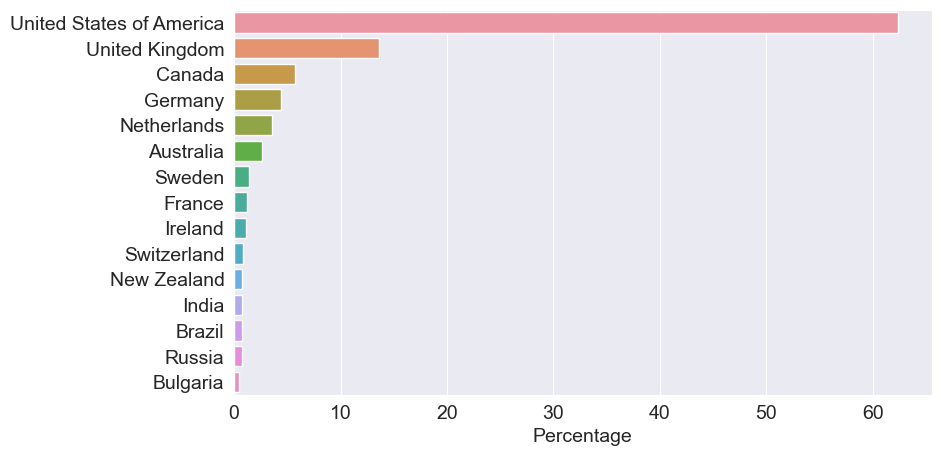

In [30]:
#plt.figure(figsize=(10,6))
pct_df = mental_survey_df['What country do you live in?'].value_counts().head(15)
pct_df_pct = ((pct_df / pct_df.sum()) * 100).round(decimals = 1)
pct_df_pct
sns.barplot(x=pct_df_pct, y=pct_df_pct.index);
plt.ylabel(None)
plt.xlabel('percentage'.title());

It appears that a disproportionately high number of respondents are from the US with over 60% of the responses and 30% from the United Kingdom and canada combined, probably because the survey is in English or may be the survey website is located in United States. We can already see that respondents from some of the non-English speaking countries are almost certainly underrepresented.

# AGE OF THE RESPONDENTS

**What is your age?**

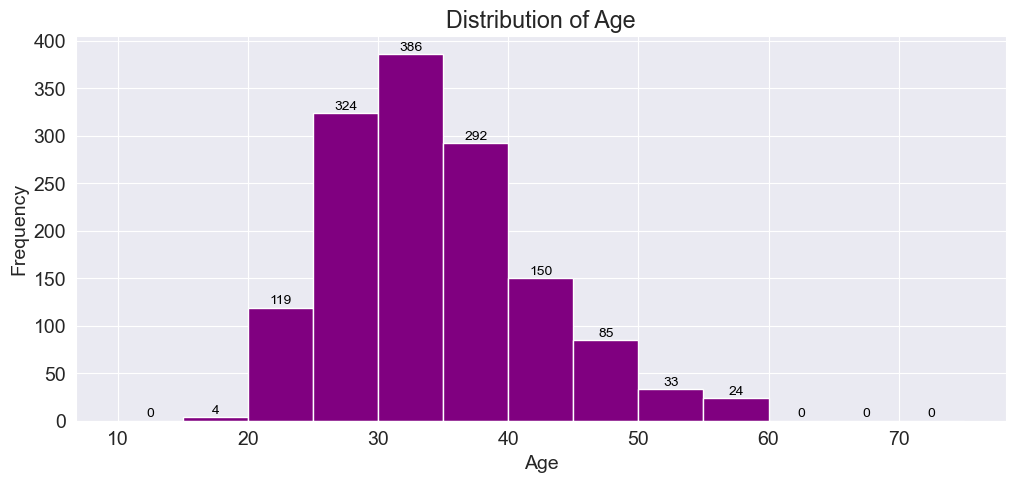

In [44]:

plt.figure(figsize=(12, 5))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.grid(axis='x')

plt.hist(mental_survey_df['What is your age?'], bins=np.arange(10,80,5), color='purple');

# Place the values on top of each bin
for i, count in enumerate(np.histogram(mental_survey_df['What is your age?'], bins=np.arange(10, 80, 5))[0]):
    plt.text(i * 5 + 12.5, count + 1, str(count), ha='center', va='bottom', fontsize=10, color='black')

The histogram depicts the distribution of employees across different age brackets, with a notable concentration in the 25-40 age range. This suggests that the workforce in these companies is relatively young, with fewer employees aged 50 and above

# Gender  Distribution Summary
What is your gender?

In [45]:
mental_survey_df['What is your gender?'].value_counts()

What is your gender?
Male      1022
Female     320
Others      75
Name: count, dtype: int64

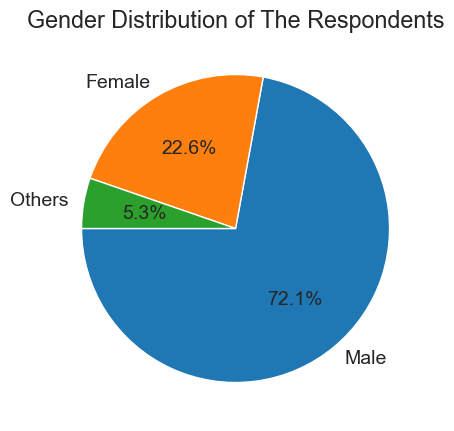

In [46]:
labels=mental_survey_df['What is your gender?'].value_counts().index,
plt.title("Gender Distribution of The Respondents")
plt.pie(mental_survey_df['What is your gender?'].value_counts(),
        labels=mental_survey_df['What is your gender?'].value_counts().index,
        autopct='%1.1f%%', startangle=180);

This gender distribution within the tech workforce in the survey taken:

1. **Male Dominance**:
   - The majority of respondents (72.1%) identify as male. This indicates a significant gender imbalance in the tech industry.
   - Organizations should actively work toward creating a more inclusive environment to attract and retain female talent.

2. **Female Representation**:
   - Females make up 22.6% of the respondents. While this is an improvement compared to the past, there's still room for growth.
   - Encouraging more women to pursue tech careers, providing mentorship, and addressing biases can help increase female representation.

3. **"Others" Category**:
   - The "Others" category (5.3%) likely includes non-binary, genderqueer, or other non-traditional gender identities.




# Self Employed distribution summary

In [48]:
# Calculating the percentage of each value
percentages = mental_survey_df['Are you self-employed?'].value_counts() / len(mental_survey_df['Are you self-employed?']) * 100

In [49]:
percentages.round(decimals=1)

Are you self-employed?
No     80.1
Yes    19.9
Name: count, dtype: float64

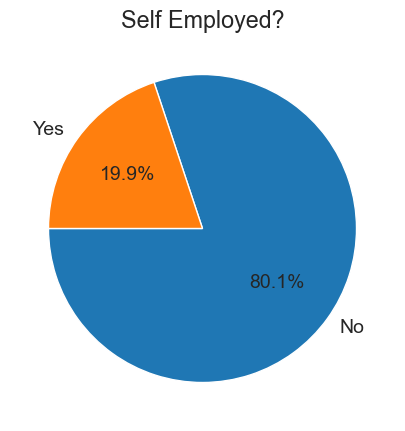

In [50]:
labels=mental_survey_df['Are you self-employed?'].value_counts().index,
plt.title("Self Employed?")
plt.pie(mental_survey_df['Are you self-employed?'].value_counts(),
        labels=mental_survey_df['Are you self-employed?'].value_counts().index,
        autopct='%1.1f%%', startangle=180);

A significant majority, 80%, of the survey respondents are not self-employed, while 20% of the respondents are self-employed.

This data suggests that self-employment is relatively uncommon among the survey participants, with the vast majority being traditionally employed.


# Work type


Do you work remotely?

In [51]:
mental_survey_df['Do you work remotely?'].value_counts()

Do you work remotely?
Sometimes    747
Always       339
Never        331
Name: count, dtype: int64

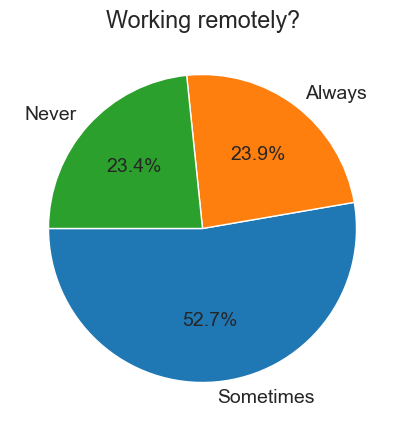

In [52]:
labels=mental_survey_df['Do you work remotely?'].value_counts().index,
plt.title("Working remotely?")
plt.pie(mental_survey_df['Do you work remotely?'].value_counts(),
        labels=mental_survey_df['Do you work remotely?'].value_counts().index,
        autopct='%1.1f%%', startangle=180);

**23.9%** of respondents work remotely often, indicating a trend towards flexible work arrangements.
**Sometimes**: **52.7%** work remotely sometimes, suggesting occasional remote work is common.
**Rarely/Never**: **23.4%** rarely or never work remotely, possibly due to job nature or personal preference.

This data reflects current work trends and the growing acceptance of remote work as a viable option for many professionals.


# Mental issue before?




- Have you been diagnosed with a mental health condition by a medical professional?

- If so, what condition(s) were you diagnosed with?

In [53]:
mental_survey_df['Have you been diagnosed with a mental health condition by a medical professional?'].value_counts()

Have you been diagnosed with a mental health condition by a medical professional?
No     710
Yes    707
Name: count, dtype: int64

This output shows that half of the respondents declared they have been diagnosed with  mental issues before

# Common mental health conditions diagnosed among the respondents

In [54]:
mental_survey_df['If so, what condition(s) were you diagnosed with?'] = mental_survey_df['If so, what condition(s) were you diagnosed with?'].str.split('|')

# Explode the list of values into separate rows
mental_survey_df = mental_survey_df.explode('If so, what condition(s) were you diagnosed with?')

# Striping any leading or whitespace from the values
mental_survey_df['If so, what condition(s) were you diagnosed with?'] = mental_survey_df['If so, what condition(s) were you diagnosed with?'].str.strip()

mental_condition = mental_survey_df['If so, what condition(s) were you diagnosed with?'][mental_survey_df['If so, what condition(s) were you diagnosed with?'] != ''].value_counts().sort_values(ascending=False).head(10)
mental_condition

If so, what condition(s) were you diagnosed with?
Mood Disorder (Depression, Bipolar Disorder, etc)               518
Anxiety Disorder (Generalized, Social, Phobia, etc)             366
Attention Deficit Hyperactivity Disorder                        131
Post-traumatic Stress Disorder                                   69
Obsessive-Compulsive Disorder                                    39
Stress Response Syndromes                                        31
Personality Disorder (Borderline, Antisocial, Paranoid, etc)     28
Substance Use Disorder                                           26
Eating Disorder (Anorexia, Bulimia, etc)                         18
Addictive Disorder                                               15
Name: count, dtype: int64

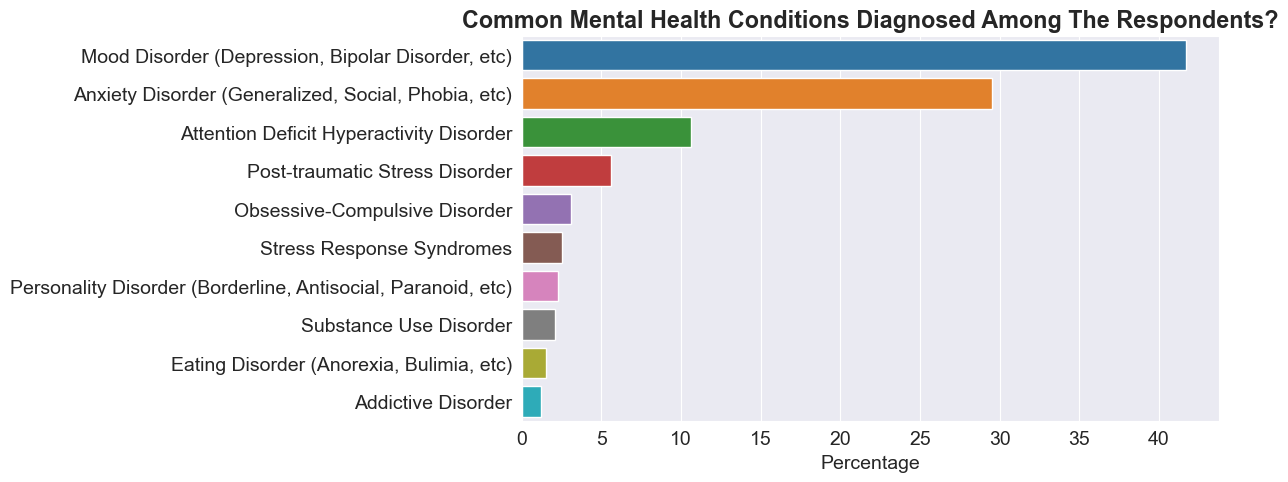

In [55]:
#plt.figure(figsize=(10,6))

pct_df = ((mental_condition / mental_condition.sum()) * 100).round(decimals = 1)
pct_df
sns.barplot(x=pct_df, y=pct_df.index);
plt.title("Common Mental Health Conditions Diagnosed Among The Respondents?", fontweight='bold')
plt.ylabel(None)
plt.xlabel('percentage'.title());

Among those respondents who took the survey and confirmed they havs been diagnosed of mental issues afore, more than 40% of them declared they have **Mood Disorder**, probably because of depression, bipolar disorder. 
28% of the respondents also declared **Anxiety Disorder** as what is wrong with them. This type of is characterized by excessive fear and worry.


1. **Anxiety Disorders**: These are characterized by excessive fear and worry, along with related behavioral disturbances. Symptoms can cause significant distress or impairment in functioning. There are various types of anxiety disorders, including generalized anxiety disorder, panic disorder, and social anxiety disorder.

2. **Depressive Disorders**: These involve a persistent feeling of sadness or a lack of interest in outside stimuli. The two most common forms are depression and bipolar disorder, both of which can lead to significant changes in a person's mood, energy level, and ability to function.

3. **Mood Disorders**: This category includes conditions with a serious change in mood as a primary symptom. It often encompasses major depressive disorder and bipolar disorder, among others. Mood disorders can lead to disruptions in a person's daily life and relationships.

These disorders are prevalent globally and can have a substantial impact on individuals' quality of life. However, effective treatments, including therapy and medications, are available.



In [56]:
#Reseting the data to drop all duplicated axis=0 indexes
mental_survey_df.reset_index(drop=True, inplace=True)

# Impact of Mental Health on Work Time Distribution

In [57]:
affected = mental_survey_df[['Do you believe your productivity is ever affected by a mental health issue?','If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?']]


In [58]:
productivity_affected_df = affected[affected["Do you believe your productivity is ever affected by a mental health issue?"] == "Yes"]


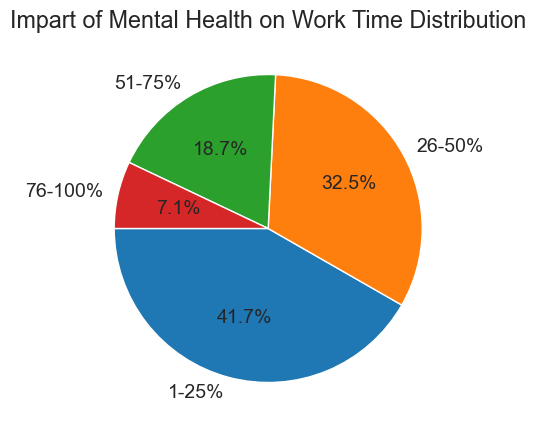

In [59]:
labels=productivity_affected_df['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts().index,
plt.title("Impart of Mental Health on Work Time Distribution")
plt.pie(productivity_affected_df['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts(),
        labels=productivity_affected_df['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts().index,
        autopct='%1.1f%%', startangle=180);

 The pie chart presents a distribution of how mental health issues affect work time among the respondents who said their time is been tampered with.

- **41.7%** of the respondents report that a smaller portion of their work time is affected by mental health issues.
- **32.5%** experience a slightly higher impact on their work time due to mental health concerns.
- **25.8%** of the respondents complained that more than half of their work time is affected.


Overall, the chart suggests that mental health issues have a varying degree of impact on work productivity, with a substantial percentage of individuals experiencing a significant effect. This highlights the importance of addressing mental health in the workplace to maintain overall work efficiency.

#### Employee Awareness of Mental Health Resources Distribution

In [60]:
awareness = mental_survey_df['Does your employer offer resources to learn more about mental health concerns and options for seeking help?']
employee_awareness = awareness[awareness.isin (["Yes", "No","I don't know"])]

#### What is the percentage of respondents whose employer provides mental health benefits as part of healthcare coverage? 

In [61]:
benefits = mental_survey_df['Does your employer provide mental health benefits as part of healthcare coverage?']
mental_health_benefits = benefits[benefits.isin (["Yes", "No","I don't know", "Not eligible for coverage / N/A"])]


#### Employee awareness on their employers if  they take mental health serious

In [62]:
health = mental_survey_df['Do you feel that your employer takes mental health as seriously as physical health?']
mental_health_serious = health[health.isin (["Yes", "No","I don't know"])]

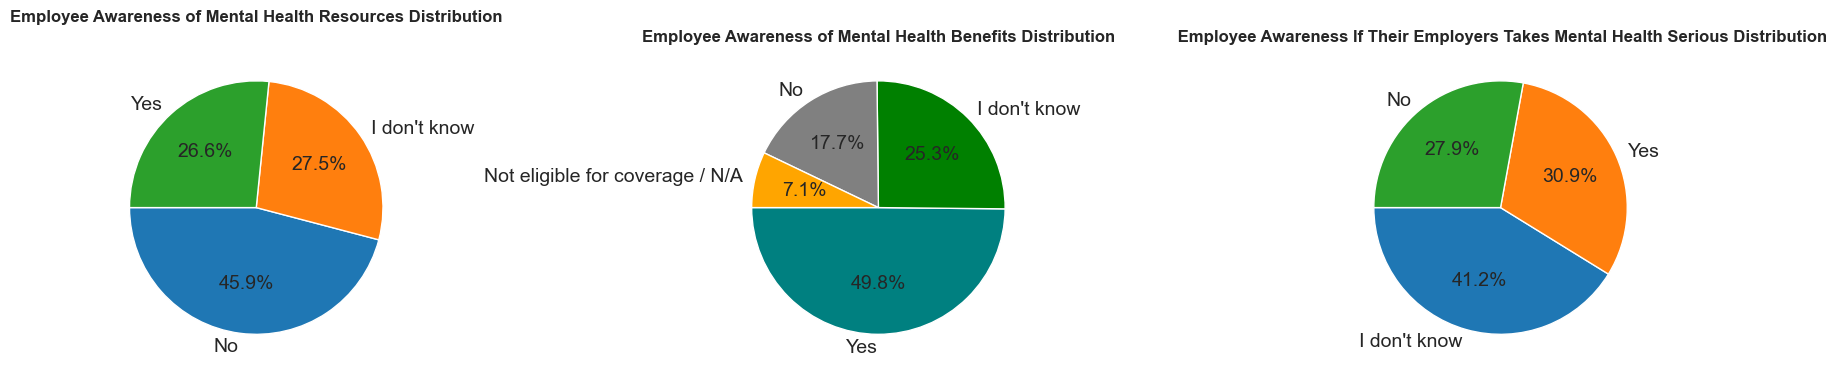

In [85]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(16, 20));

# Define the grid layout
gs = gridspec.GridSpec(1, 3);

# Create subplots
ax1 = fig.add_subplot(gs[0, 0]);
ax2 = fig.add_subplot(gs[0, 1]);
ax3 = fig.add_subplot(gs[0, 2]);

# Assuming you have already imported necessary libraries and created the pie chart
colors = ['#FFD700', '#FFA500', '#87CEEB', '#808080']


labels=employee_awareness.value_counts().index,
ax1.pie(employee_awareness.value_counts(),
        labels=employee_awareness.value_counts().index,
        autopct='%1.1f%%', startangle=180, );

# Move the pie chart downwards
#ax1.set_position([0.53, 0.13, 0.5, 0.25]);  # Adjust the coordinates as needed
ax1.set_title("Employee Awareness of Mental Health Resources Distribution", fontsize=12, fontweight='bold', pad=20);




# Assuming you have already imported necessary libraries and created the pie chart
colors = ['teal', 'green', 'grey', 'orange']

#Anxiety Disorder
labels=mental_health_benefits.value_counts().index,

ax2.pie(mental_health_benefits.value_counts(),
        labels=mental_health_benefits.value_counts().index,
        autopct='%1.1f%%', startangle=180, colors=colors);

ax2.set_title("Employee Awareness of Mental Health Benefits Distribution",fontweight='bold',fontsize=12)




# Attention Disorder
labels=mental_health_serious.value_counts().index,
ax3.set_title(" Employee Awareness If Their Employers Takes Mental Health Serious Distribution",fontweight='bold',fontsize=12)
ax3.pie(mental_health_serious.value_counts(),
        labels=mental_health_serious.value_counts().index,
        autopct='%1.1f%%', startangle=180);





plt.tight_layout(pad=1);

1. **Employee Awareness of Mental Health Resources**:
   - The first pie chart shows that:
     - **26.6%** of employees are aware of mental health resources (green segment).
     - **45.9%** of employees are not aware of mental health resources (blue segment).
     - **27.5%** of employees are unsure (orange segment).

2. **Employee Awareness of Mental Health Benefits**:
   - The second pie chart depicts:
     - **49.8%** of employees are aware of mental health benefits (blue segment).
     - **17.7%** of employees are not aware of mental health benefits (green segment).
     - **25.3%** of employees are unsure (orange segment).
     - **7.1%** of employees are not eligible for coverage or it's not applicable (red segment).

3. **Employee Perception of Employer's Seriousness About Mental Health**:
   - The third pie chart reveals:
     - **30.9%** of employees believe their employers take mental health seriously (orange segment).
     - **27.9%** of employees think their employers do not take mental health seriously (green segment).
     - **41.2%** of employees are uncertain (blue segment).

These charts highlight employee awareness of mental health resources and benefits, as well as their perception of employer commitment to mental health. I think it is  essential for organizations to foster awareness and prioritize mental well-being in the workplace.



### Do you feel that being identified as a person with a mental health issue would hurt your career?

In [64]:
identifying_as_mental_issues = mental_survey_df['Do you feel that being identified as a person with a mental health issue would hurt your career?']

In [65]:
comfortable = mental_survey_df['Would you feel comfortable discussing a mental health disorder with your coworkers?']
comfortable_discussing = comfortable[comfortable.isin (["Yes", "No","Maybe"])]

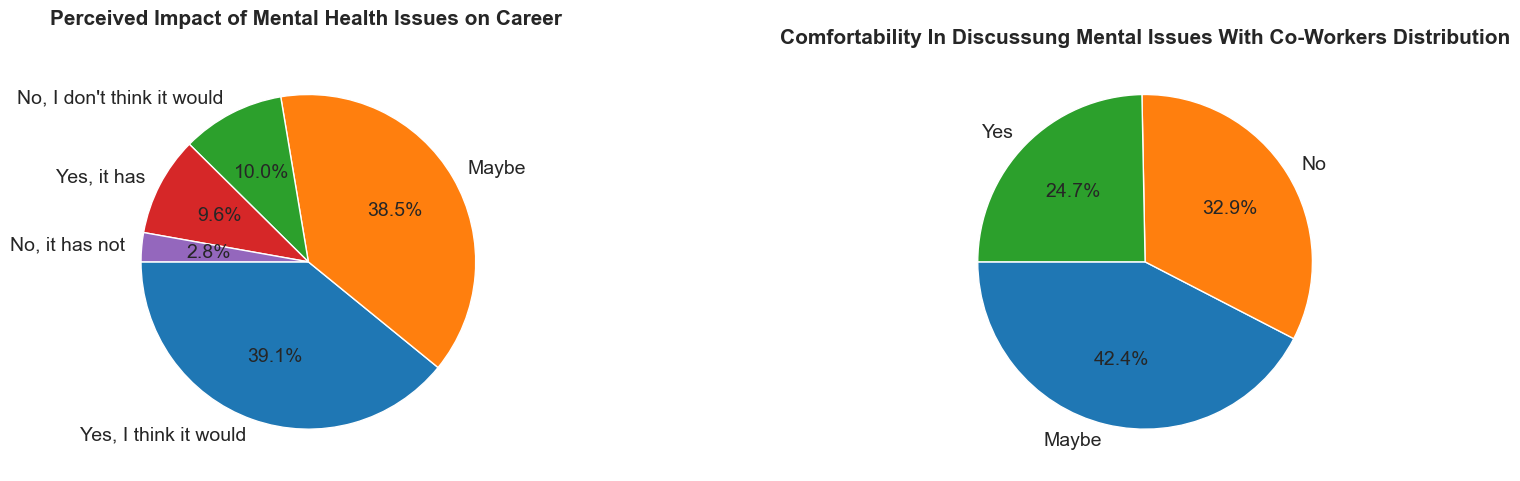

In [66]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(20, 5));

# Define the grid layout
gs = gridspec.GridSpec(1, 2);

# Create subplots
ax1 = fig.add_subplot(gs[0, 0]);
ax2 = fig.add_subplot(gs[0, 1]);
#ax3 = fig.add_subplot(gs[0, 2]);


colors = ['#FFD700', '#FFA500', '#87CEEB', '#808080']


# "Perceived Impact of Mental Health Issues on Career 
labels=identifying_as_mental_issues.value_counts().index,
ax1.set_title("Perceived Impact of Mental Health Issues on Career ",fontsize=15, fontweight='bold', pad=20)
ax1.pie(identifying_as_mental_issues.value_counts(),
        labels=identifying_as_mental_issues.value_counts().index,
        autopct='%1.1f%%', startangle=180);


##Comfortability discussing your mental state with coworker
labels= comfortable_discussing.value_counts().index,

ax2.pie(comfortable_discussing.value_counts(),
        labels=comfortable_discussing.value_counts().index,
        autopct='%1.1f%%', startangle=180);

ax2.set_title("Comfortability In Discussung Mental Issues With Co-Workers Distribution",fontweight='bold',fontsize=15)


plt.tight_layout(pad=1);

The pie chart represents people's responses to the question: "Do you feel that being identified as a person with a mental health issue would hurt your career?"
   - The responses are categorized into four groups:
     - **"Maybe"** (38.5%) thinks their career would be jeopadized. 
     - **(10.0%)** convincely said **"No, they don't think it would"** 
     - **"Yes, it has"** (9.6%)who identified  as mental health persons said it has hurt their career.
     - **"No, it has not"** (2.8%) identifying as a mental health person does not affect their career.
     - **2.85** said they don't think it can have any effect.  
    
 On the other hand,
     - **24.7%** said they there's no problem disscussing mental issues with thier co-workers
     - **32.9%** not comfortable and,
     - **42.4%** of the respondents are unsure of sharing mental issues with co-workers.  

## Age and Diagnosed Conditions Data Extraction


In [67]:
grouping_df = mental_survey_df[['What is your age?', 'If so, what condition(s) were you diagnosed with?']]


## Age and mood disorder

In [ ]:
mood_disorder = grouping_df[grouping_df['If so, what condition(s) were you diagnosed with?'].isin(['Mood Disorder (Depression, Bipolar Disorder, etc)'])].value_counts().reset_index()
mood_disorder[['What is your age?','count']]

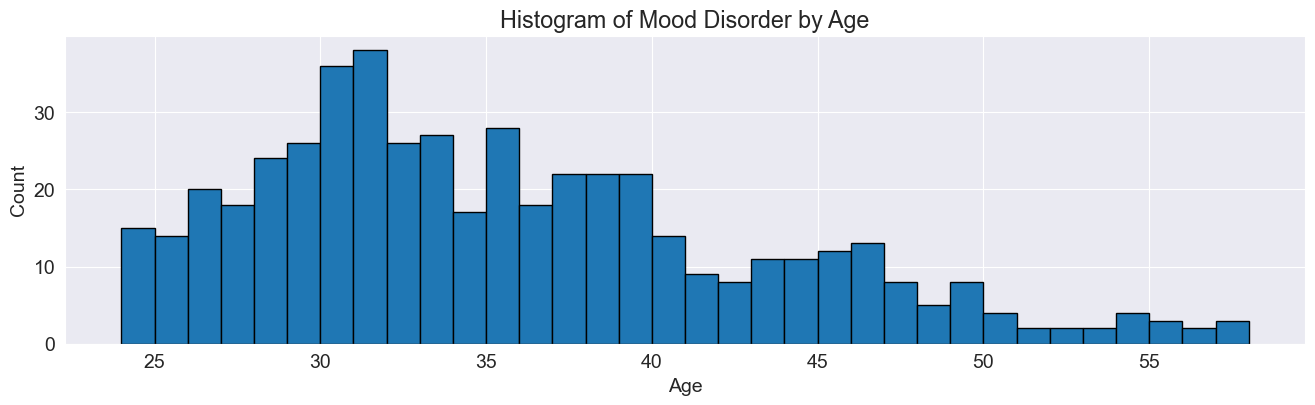

In [69]:

plt.subplots(figsize=(16, 4))
plt.hist(mood_disorder['What is your age?'], weights=mood_disorder['count'], bins=range(24, 59), edgecolor='black')
plt.title('Histogram of Mood Disorder by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


This histogram represents the distribution of **mood disorders** across different ages. It shows a notable peak at around age 35, where the count of individuals with mood disorders is the highest. Beyond this age, there is a general decline in the number of cases, with some fluctuations. This suggests that mood disorders are most prevalent in the mid-thirties age group within the surveyed population. The data could be indicative of the age-related stresses or life events that contribute to mental health issues, highlighting the importance of targeted mental health support for this age group.



## Age and anxiety disorder

In [ ]:
anxiety_disorder = grouping_df[grouping_df['If so, what condition(s) were you diagnosed with?'].isin(['Anxiety Disorder (Generalized, Social, Phobia, etc)'])].value_counts().reset_index()
anxiety_disorder[['What is your age?','count']]

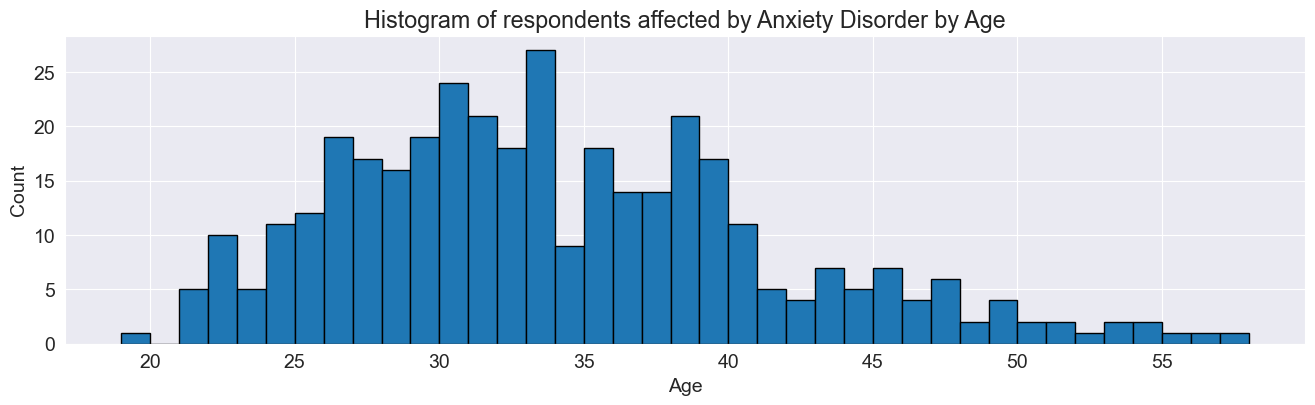

In [71]:
plt.subplots(figsize=(16, 4))
plt.hist(anxiety_disorder['What is your age?'], weights=anxiety_disorder['count'], bins=range(19, 59), edgecolor='black')
plt.title('Histogram of respondents affected by Anxiety Disorder by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Age and attention disorder

In [ ]:
attention_disorder = grouping_df[grouping_df['If so, what condition(s) were you diagnosed with?'].isin(['Attention Deficit Hyperactivity Disorder'])].value_counts().reset_index()
attention_disorder[['What is your age?','count']]

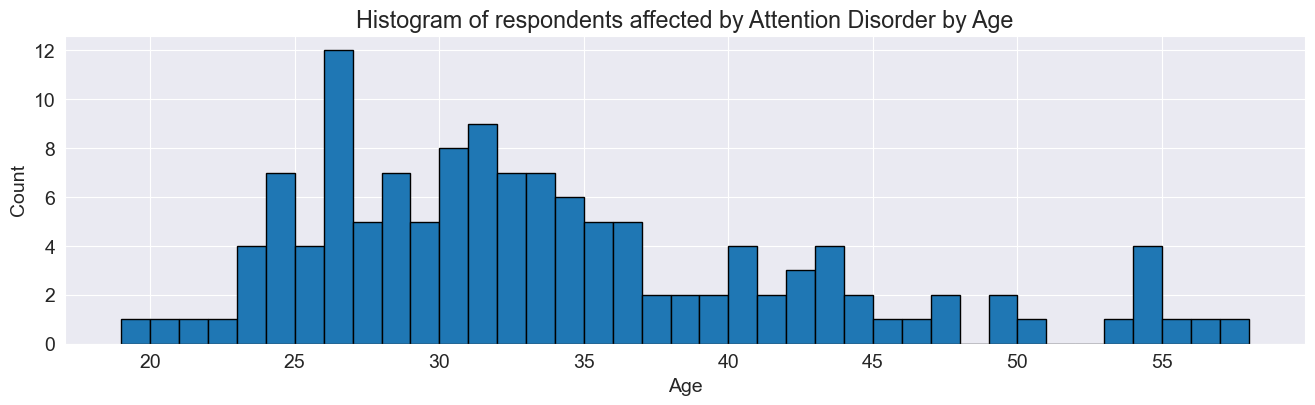

In [73]:
plt.subplots(figsize=(16, 4))
plt.hist(attention_disorder['What is your age?'], weights=attention_disorder['count'], bins=range(19, 59), edgecolor='black')
plt.title('Histogram of respondents affected by Attention Disorder by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

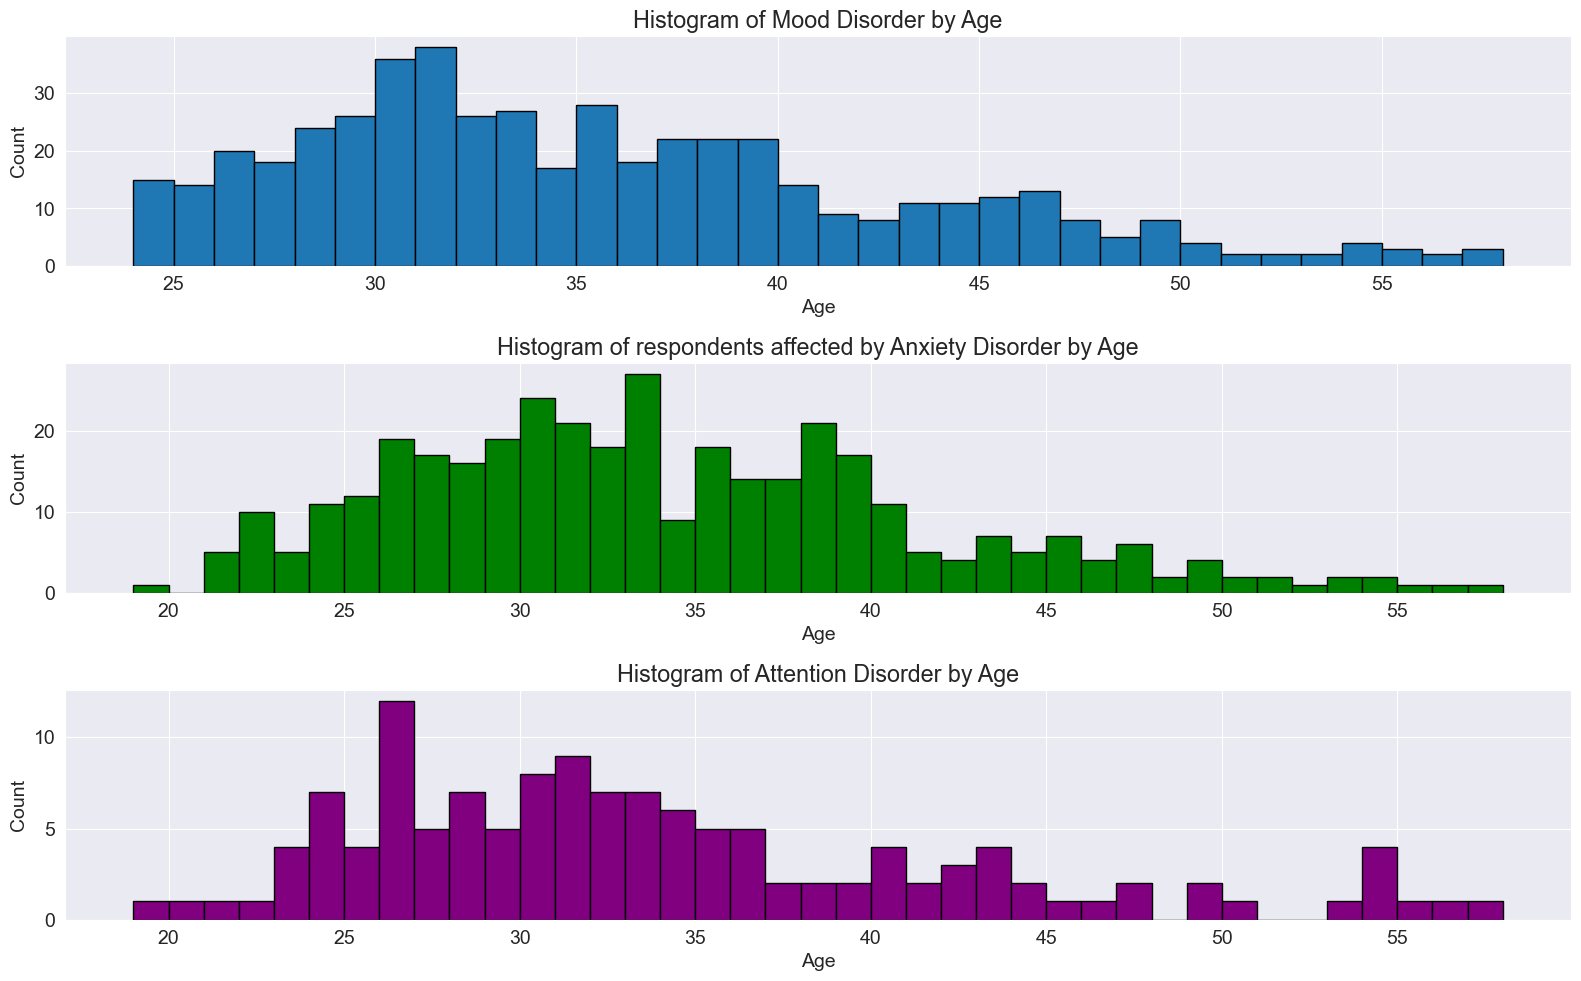

In [74]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(16, 10));

# Define the grid layout
gs = gridspec.GridSpec(3, 1);

# Create subplots
ax1 = fig.add_subplot(gs[0, :]);
ax2 = fig.add_subplot(gs[1, 0]);
ax3 = fig.add_subplot(gs[2, 0]);



# Mood Disorder
ax1.hist(mood_disorder['What is your age?'], weights=mood_disorder['count'], bins=range(24, 59), edgecolor='black')
ax1.set_title('Histogram of Mood Disorder by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')



#Anxiety Disorder

ax2.hist(anxiety_disorder['What is your age?'], weights=anxiety_disorder['count'], bins=range(19, 59), color='green', edgecolor='black')
ax2.set_title('Histogram of respondents affected by Anxiety Disorder by Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')


# Attention Disorder
ax3.hist(attention_disorder['What is your age?'], weights=attention_disorder['count'], bins=range(19, 59), color='purple', edgecolor='black')

# Customize the subplot
ax3.set_title('Histogram of Attention Disorder by Age')
ax3.set_xlabel('Age')
ax3.set_ylabel('Count')




plt.tight_layout(pad=1);

This subplots provide a comprehensive summary of the prevalence of different mental health disorders across various age groups. 

1. **Mood Disorder by Age:**
   - The blue histogram shows that mood disorders are most prevalent in the age group of 30-35 years. This suggests that people in their early to mid-thirties are more likely to report mood disorders.

2. **Anxiety Disorder by Age:**
   - The green histogram indicates that anxiety disorders are most common among younger adults, particularly those aged 25-35 years. The frequency of anxiety disorders appears to decrease with age.

3. **Attention Disorder by Age:**
   - The purple histogram reveals a sharp peak at the age of 27, indicating a high prevalence of attention disorders among people at this age.

Overall, these histograms highlight the age groups that are most affected by each type of disorder, which can be valuable information for healthcare providers and policymakers to tailor mental health interventions and support services. The visualizations suggest that while mood and anxiety disorders are more spread across a range of ages, attention disorders peak sharply at a specific age.



# Work Position of the respondents

In [75]:
# Extract the official language of each positions
work_type = mental_survey_df['Which of the following best describes your work position?'].str.split('|').str[0].str.split('/').str[0].str.strip()

# Add the official work_type column to the DataFrame
mental_survey_df = mental_survey_df.assign(**{'Work_type': work_type})



In [76]:
work_type = mental_survey_df[['Work_type','If so, what condition(s) were you diagnosed with?']]



#### Work position of those with mood disorder

In [ ]:
mood_disorder = work_type[work_type['If so, what condition(s) were you diagnosed with?'].isin(['Mood Disorder (Depression, Bipolar Disorder, etc)'])].value_counts().reset_index()
mood_disorder[['Work_type','count']]

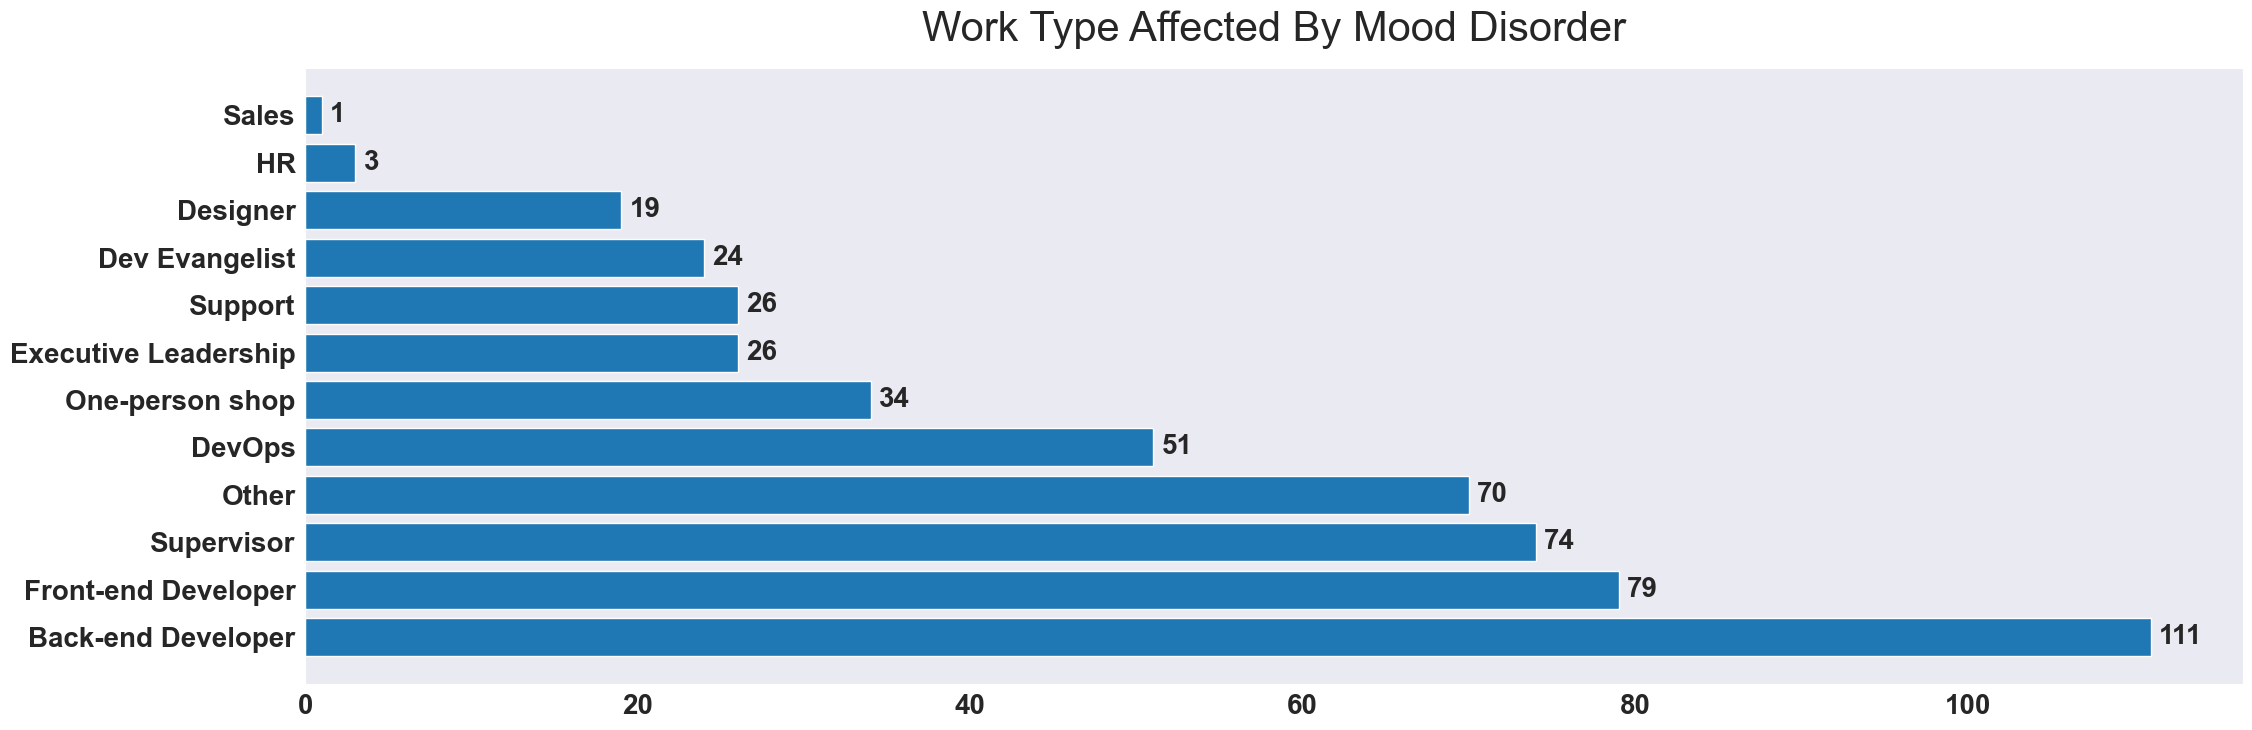

In [78]:
plt.figure(figsize=(25, 8))
bars = plt.barh(mood_disorder['Work_type'], mood_disorder['count'],);


# Add value labels above each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", ha='left', va='center', fontweight='bold',fontsize=20)
    
    

plt.yticks(fontweight='bold', fontsize=20)
plt.xticks(fontweight='bold', fontsize=20)
plt.title('Work Type Affected By Mood Disorder',fontsize=30,pad=20)

plt.grid(False)
plt.show() 

#### Work position of respondents with anxiety disorder

In [ ]:
anxiety_disorder = work_type[work_type['If so, what condition(s) were you diagnosed with?'].isin(['Anxiety Disorder (Generalized, Social, Phobia, etc)'])].value_counts().reset_index().sort_values("count", ascending=True)
anxiety_disorder[['Work_type','count']]

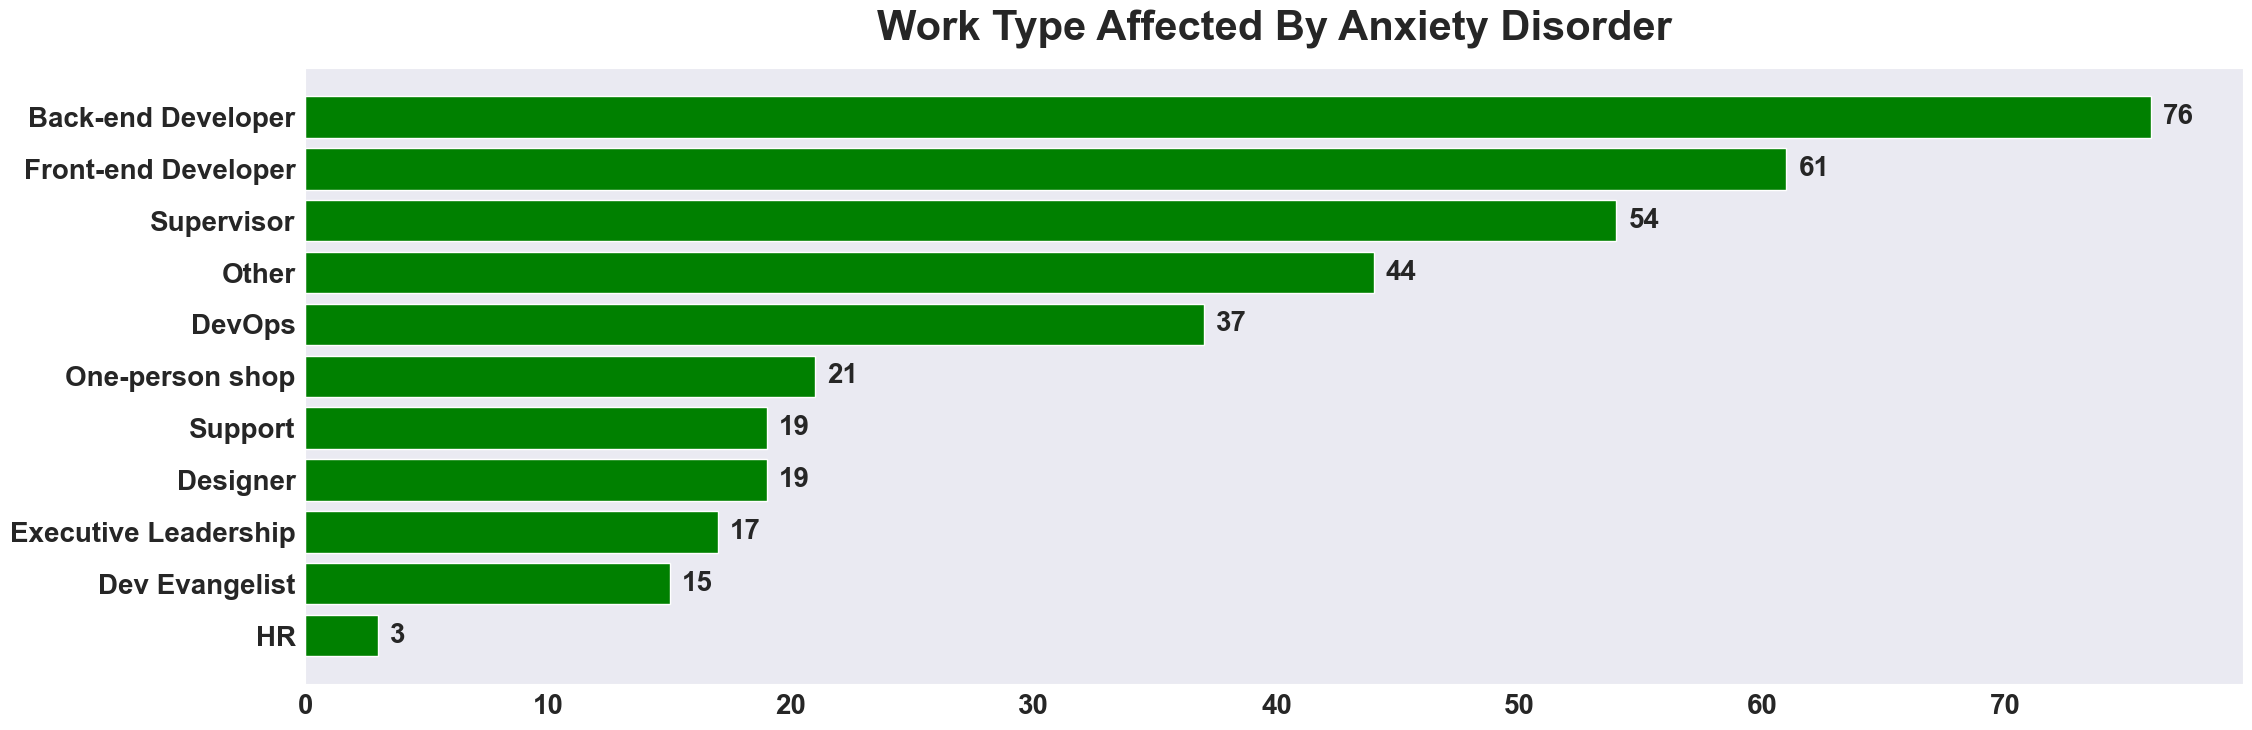

In [80]:
plt.figure(figsize=(25, 8))
bars = plt.barh(anxiety_disorder['Work_type'], anxiety_disorder['count'], color='green');


# Add value labels above each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", ha='left', va='center', fontweight='bold',fontsize=20)
    
    

plt.yticks(fontweight='bold', fontsize=20)
plt.xticks(fontweight='bold', fontsize=20)
plt.title('Work Type Affected By Anxiety Disorder',fontsize=30, fontweight='bold',pad=20)

plt.grid(False)
plt.show()    

**Work position of those with attention disorder**

In [ ]:
attention_disorder = work_type[work_type['If so, what condition(s) were you diagnosed with?'].isin(['Attention Deficit Hyperactivity Disorder'])].value_counts().reset_index().sort_values("count", ascending=True)
attention_disorder[['Work_type','count']]

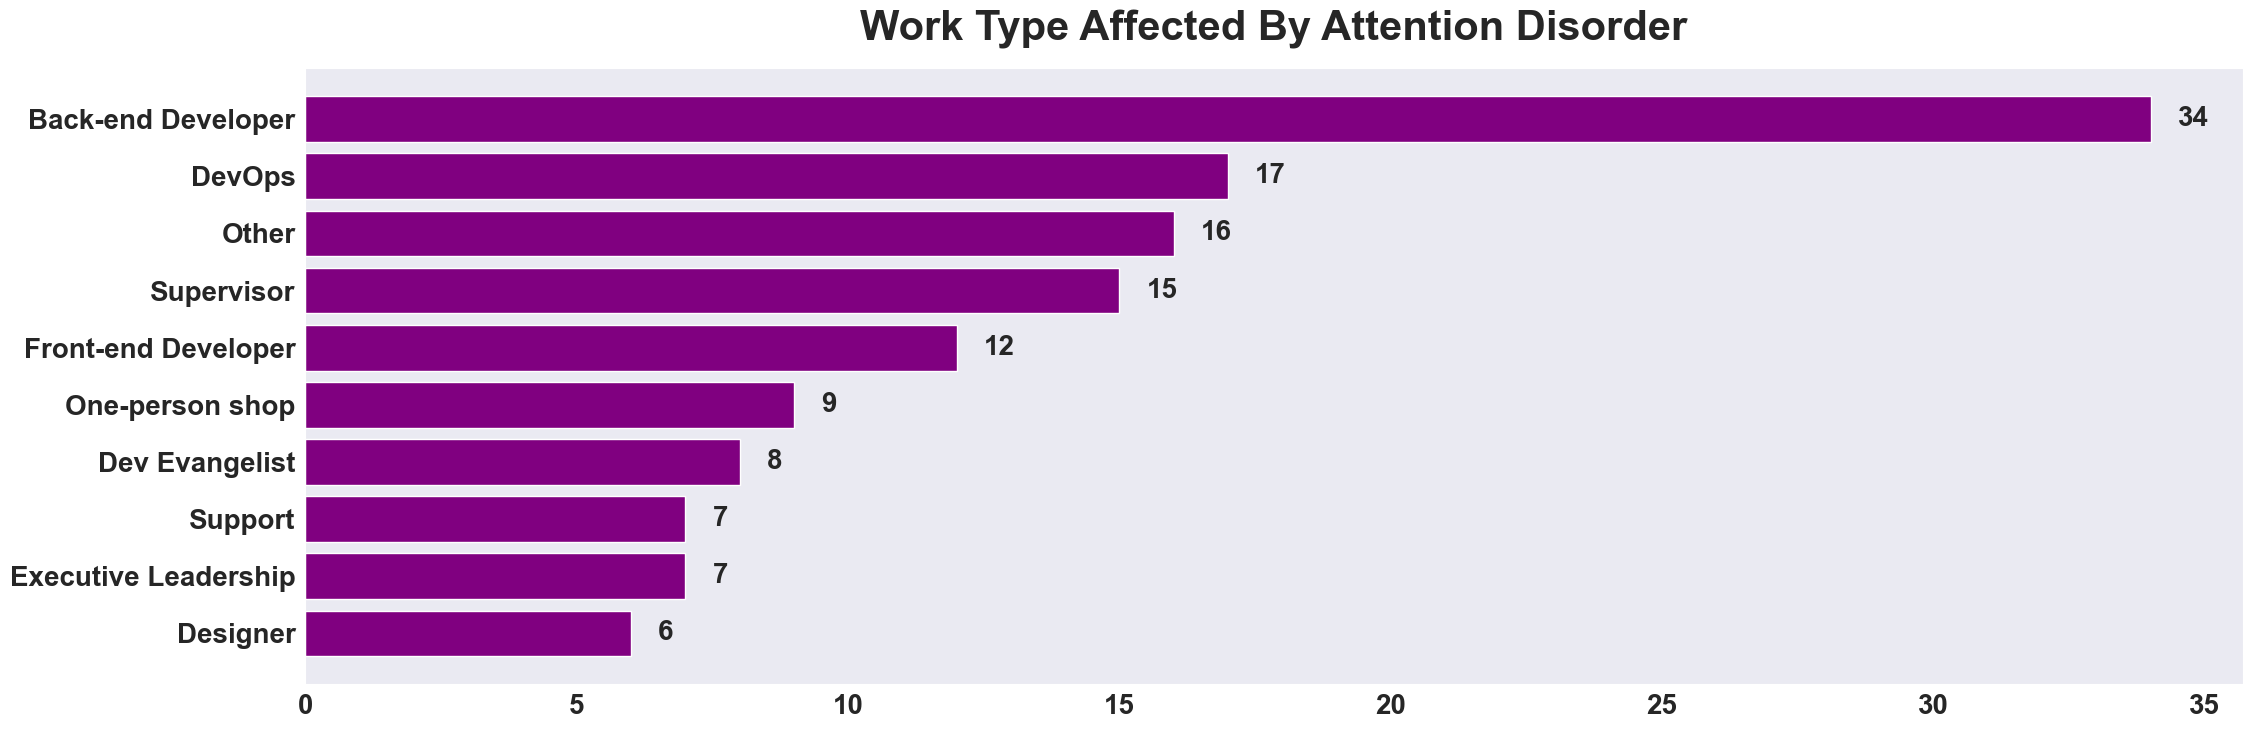

In [82]:
plt.figure(figsize=(25, 8))
bars = plt.barh(attention_disorder['Work_type'], attention_disorder['count'], color='purple');


# Add value labels above each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", ha='left', va='center', fontweight='bold',fontsize=20)
    
    

plt.yticks(fontweight='bold', fontsize=20)
plt.xticks(fontweight='bold', fontsize=20)
plt.title('Work Type Affected By Attention Disorder',fontsize=30, fontweight='bold', pad=20)

plt.grid(False)
plt.show() 

### Comprehensive summaries of the work positions

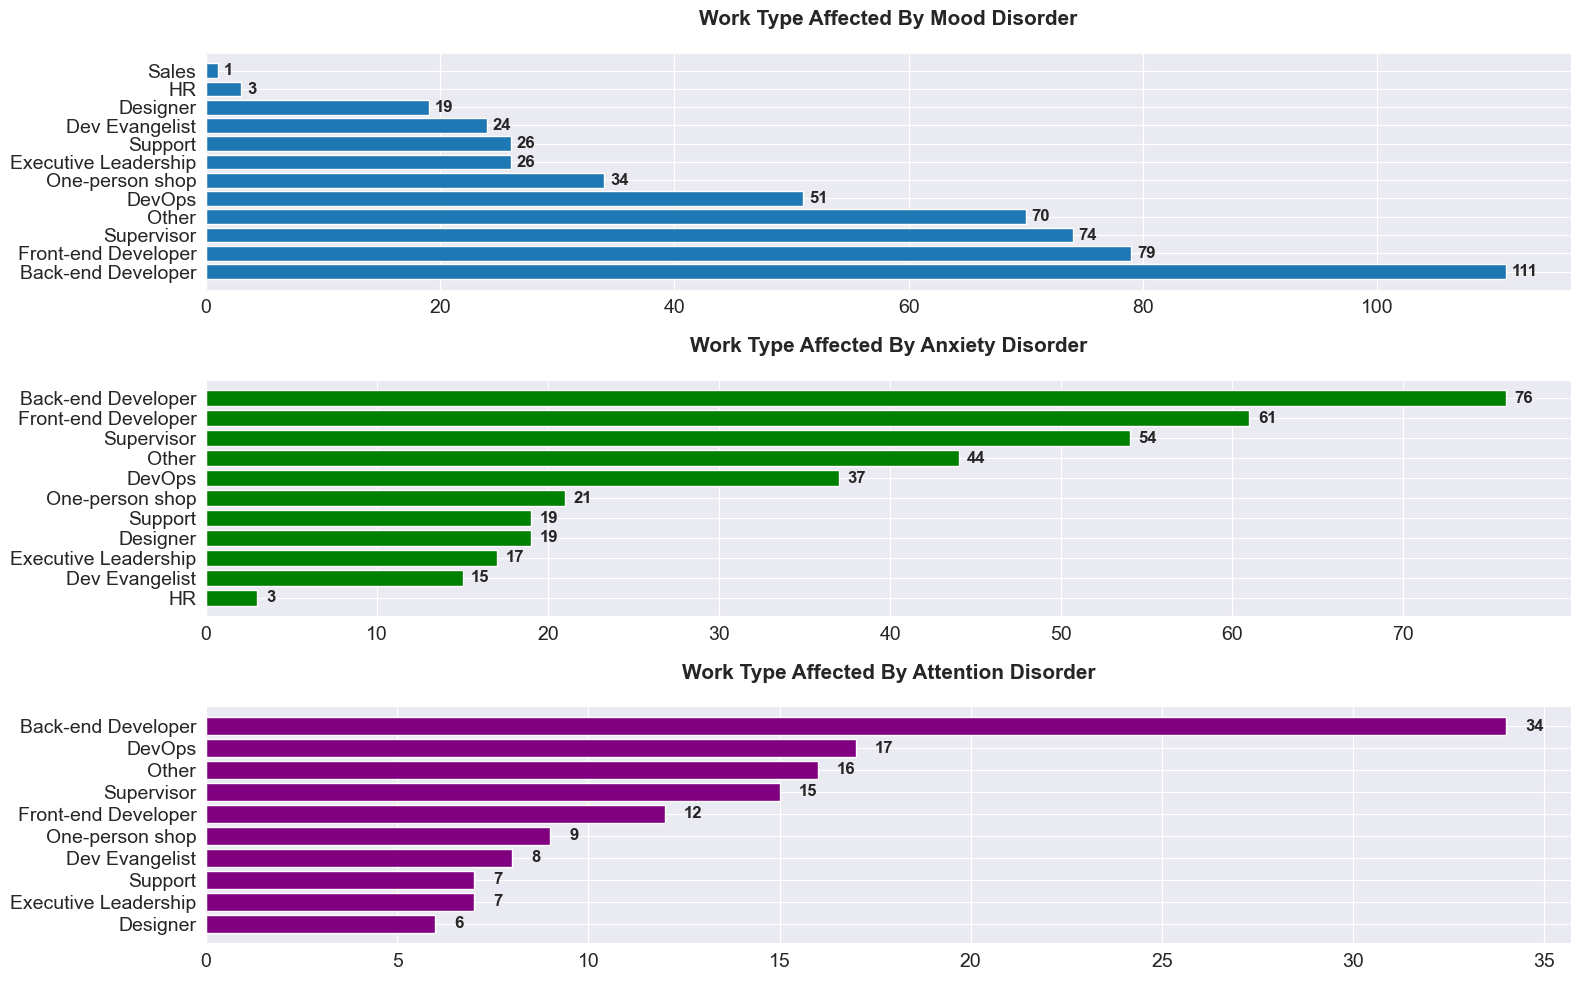

In [83]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(16, 10));

# Define the grid layout
gs = gridspec.GridSpec(3, 1);

# Create subplots
ax1 = fig.add_subplot(gs[0, 0]);
ax2 = fig.add_subplot(gs[1, 0]);
ax3 = fig.add_subplot(gs[2, 0]);



# Work Type Affected By Mood Disorder
bars = ax1.barh(mood_disorder['Work_type'], mood_disorder['count'],);


# Add value labels above each bar
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", ha='left', va='center', fontweight='bold',fontsize=12)
    
ax1.set_title('Work Type Affected By Mood Disorder',fontsize=15,pad=20,fontweight='bold')



#Work Type Affected By Anxiety Disorder
bars = ax2.barh(anxiety_disorder['Work_type'], anxiety_disorder['count'], color='green');


# Add value labels above each bar
for bar in bars:
    width = bar.get_width()
    ax2.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", ha='left', va='center', fontweight='bold',fontsize=12)
    
ax2.set_title('Work Type Affected By Anxiety Disorder',fontsize=15, fontweight='bold',pad=20)



# Work Type Affected By Attention Disorder
bars = ax3.barh(attention_disorder['Work_type'], attention_disorder['count'], color='purple');


# Add value labels above each bar
for bar in bars:
    width = bar.get_width()
    ax3.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.0f}", ha='left', va='center', fontweight='bold',fontsize=12)
    
    
ax3.set_title('Work Type Affected By Attention Disorder',fontsize=15, fontweight='bold', pad=20)


plt.tight_layout(pad=1);

1. **Work Type Affected by Mood Disorder**:
   - Among the listed work types, **back-end developers** appear to be most affected by mood disorders.
   - **Front-end developers** and **supervisors** also show a significant prevalence of mood disorders.
   - Other work types, such as **one-person shop**, **designer support**, and **executive leadership**, have relatively lower prevalence.

2. **Work Type Affected by Anxiety Disorder**:
     - **Back-end Developers** show the highest prevalence of anxiety disorder.
     - **Front-end Developers** and **Supervisors** also exhibit significant prevalence.
     - Other work types, such as **DevOps**, **One-person shop**, and **Support**, have varying levels of impact.
     - **HR** appears to be the least affected, with only **3** individuals reporting anxiety disorder.

3. **Work Type Affected by Attention Disorder**:
   - **Back-end Developers** show the highest prevalence of anxiety disorder.
   - **DevOps** workers seem to be significantly affected by attention disorders.
  

Among the various work types, back-end developers and front-end developers appear to be significantly affected by mental health disorders. Addressing mental health in the workplace is very important, and understanding how different work types are affected by various mental health disorders can guide targeted interventions and support. It's essential for organizations to promote awareness, provide resources, and foster a supportive environment for employees' well-being and provide support for all employees, regardless of their roles.



### In Conclution:
    
It is important to seek help if you or someone you know is struggling with mental health issues. The Mayo Clinic suggests that a combination of medications and talk therapy (psychotherapy) can help manage symptoms of mental illness. 

To avoid mental health issues, it is important to take care of your mental health. BetterUp, a mental health platform, provides tips on how to promote mental health awareness within your community and access additional resources³. Some of the tips include:

- **Prioritize self-care**: Take time for yourself and engage in activities that you enjoy.
- **Stay connected**: Build and maintain healthy relationships with family and friends.
- **Practice mindfulness**: Mindfulness can help reduce stress and improve overall well-being.
- **Exercise regularly**: Exercise can help reduce symptoms of depression and anxiety.
- **Get enough sleep**: Sleep is essential for good mental health.
- **Eat a healthy diet**: A healthy diet can help improve mood and reduce symptoms of depression.    